<a href="https://colab.research.google.com/github/lucasjsbarbosa/series-temporais-vendas-de-uma-loja/blob/main/series_temporais_departamento_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from prophet import Prophet
import matplotlib.dates as mdates

## Importação das vendas

In [68]:
sales_train_df = pd.read_csv('train.csv')

<ipython-input-68-804f93bbe1a2>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


In [69]:
sales_train_df.shape

(1017209, 9)

In [70]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [71]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [72]:
sales_train_df['Open'].unique()

array([1, 0])

In [73]:
sales_train_df['Promo'].unique()

array([1, 0])

In [74]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [75]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0])

In [76]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [77]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [78]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


 ## Importação das lojas

In [79]:
store_df = pd.read_csv('store.csv')

In [80]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [81]:
store_df.shape

(1115, 10)

In [82]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [83]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [84]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## EDA vendas

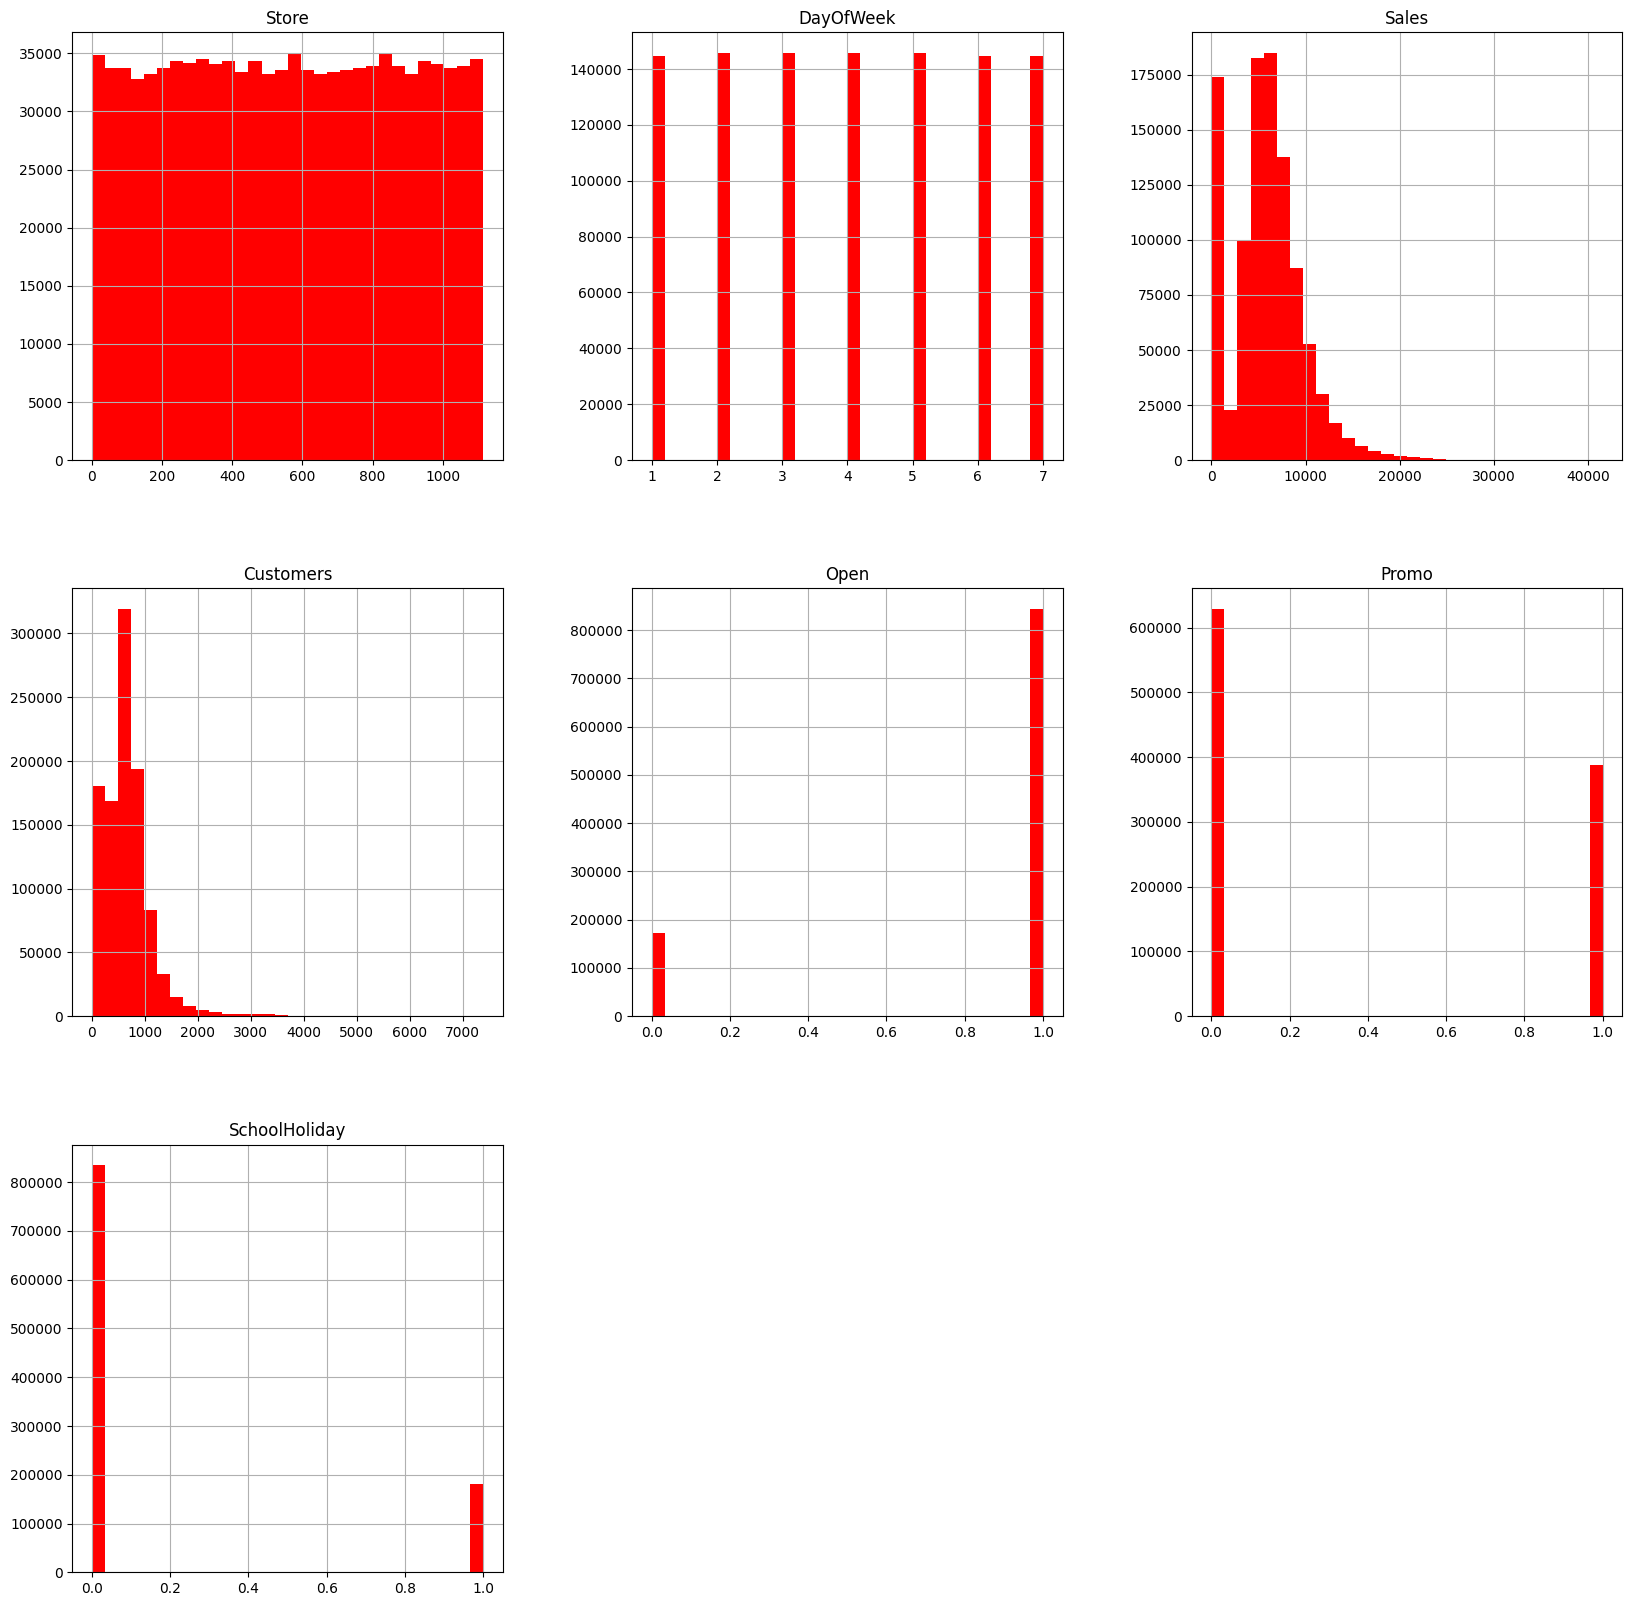

In [36]:
sales_train_df.hist(bins = 30, figsize=(20,20), color = 'r');

In [37]:
sales_train_df['Customers'].max()

7388

In [38]:
sales_train_df['Customers'].max()

7388

Usaremos apenas os dias que as lojas estavam abertas no dataframe para não acontecer interferências nas medidas estatísticas.

In [39]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [40]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [41]:
sales_train_df.drop(['Open'], axis=1, inplace=True)

<ipython-input-41-9c3f573dda6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df.drop(['Open'], axis=1, inplace=True)


In [42]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


## EDA lojas

In [43]:
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [44]:
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [45]:
store_df[store_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [46]:
store_df[store_df['Promo2'] == 0 ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [47]:
string_cols = ['Promo2','Promo2SinceWeek', 'Promo2SinceYear','PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']
for str in string_cols:
    store_df[str].fillna(0, inplace=True)

In [48]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)

In [49]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

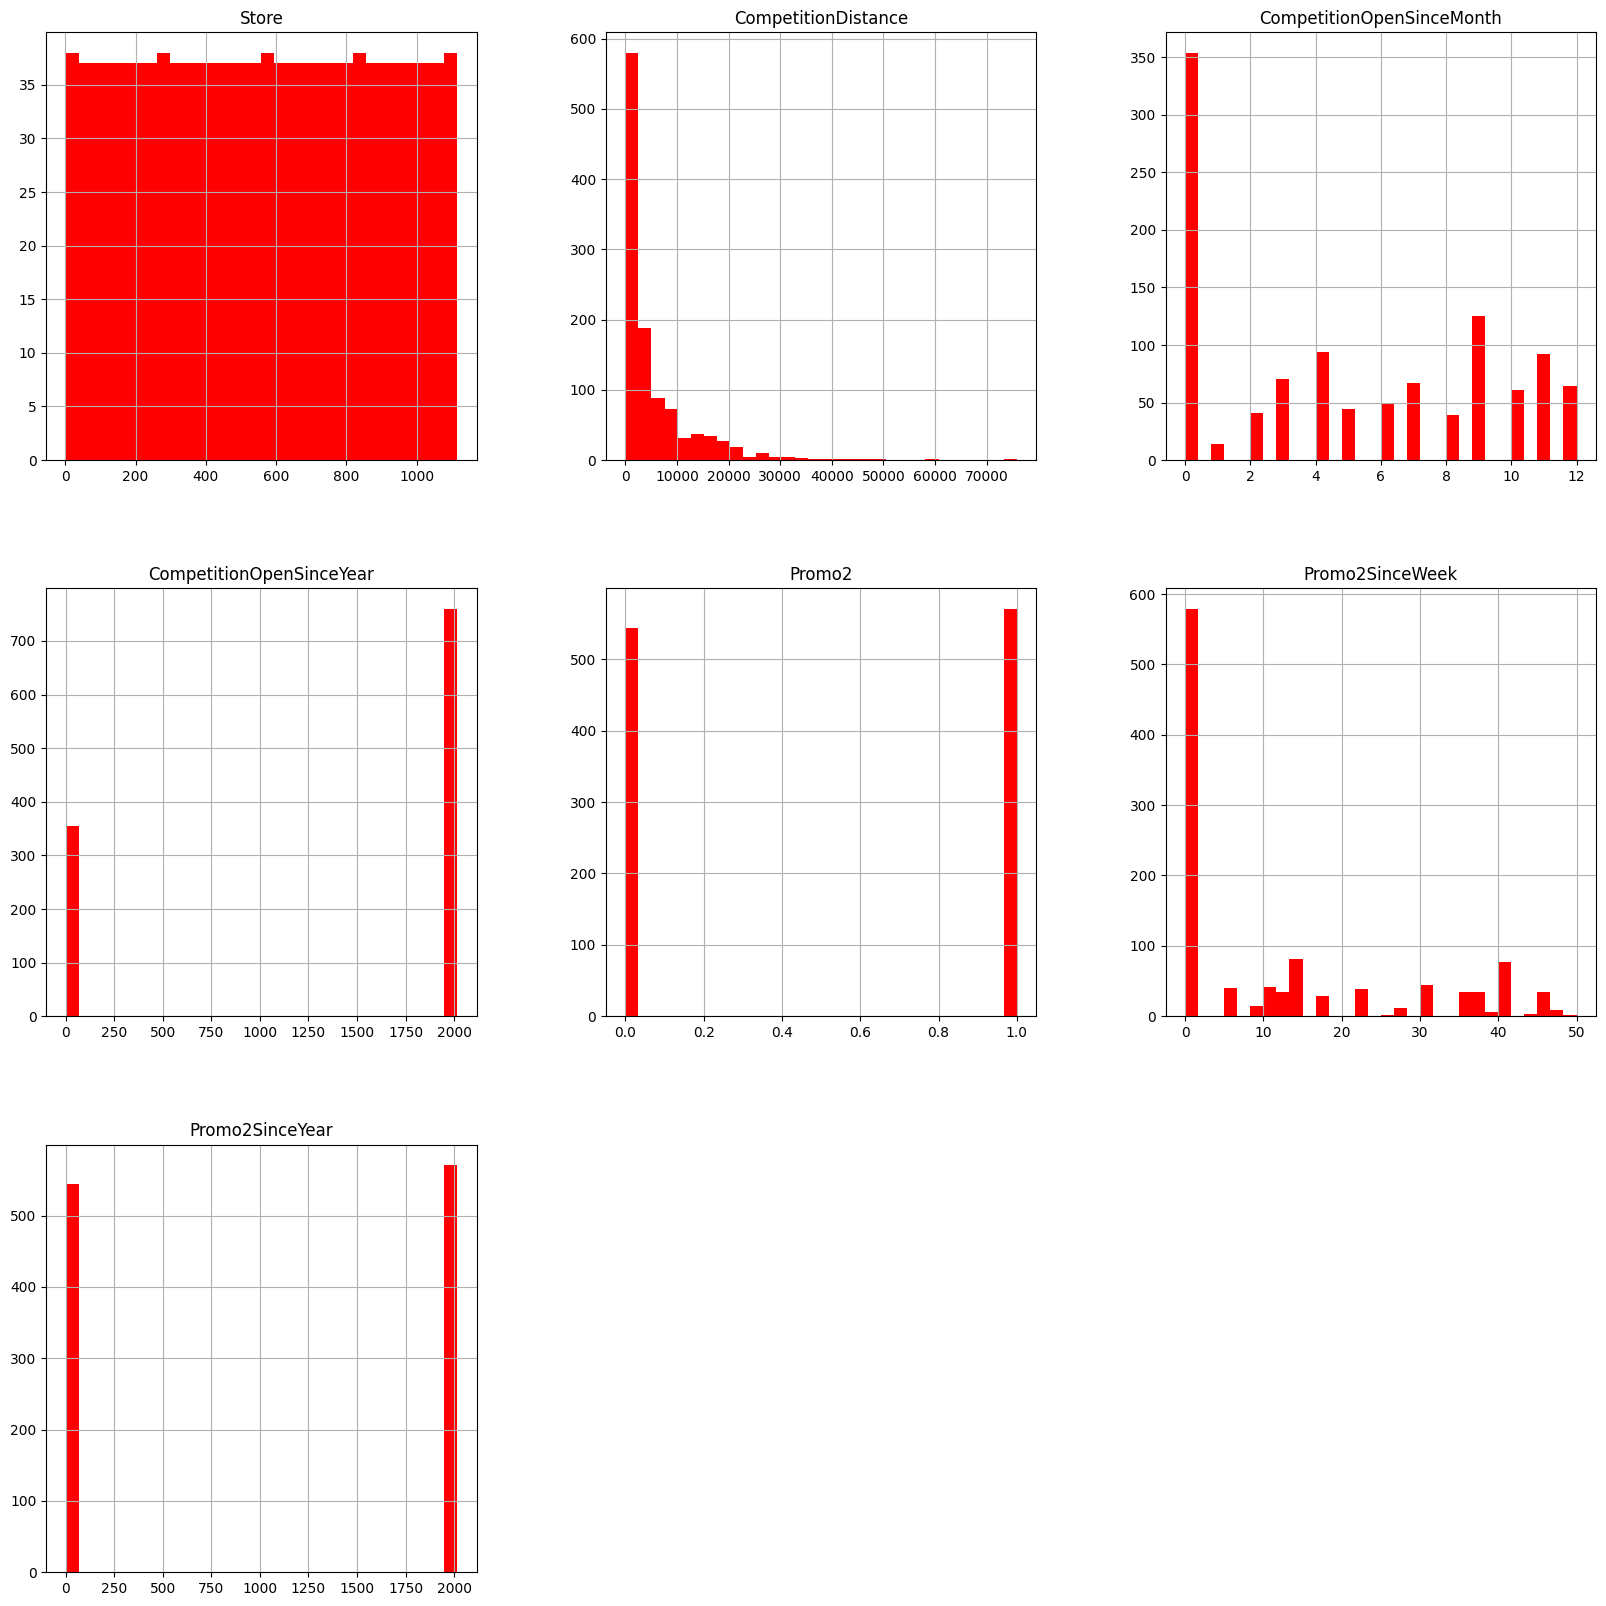

In [50]:
store_df.hist(bins=30,figsize=(20,20), color='r');

## EDA Merge

In [51]:
sales_train_all = pd.merge(sales_train_df, store_df , how = 'inner' , on ='Store')

In [52]:
sales_train_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


<ipython-input-53-67411b3161ea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all.corr()


<Axes: >

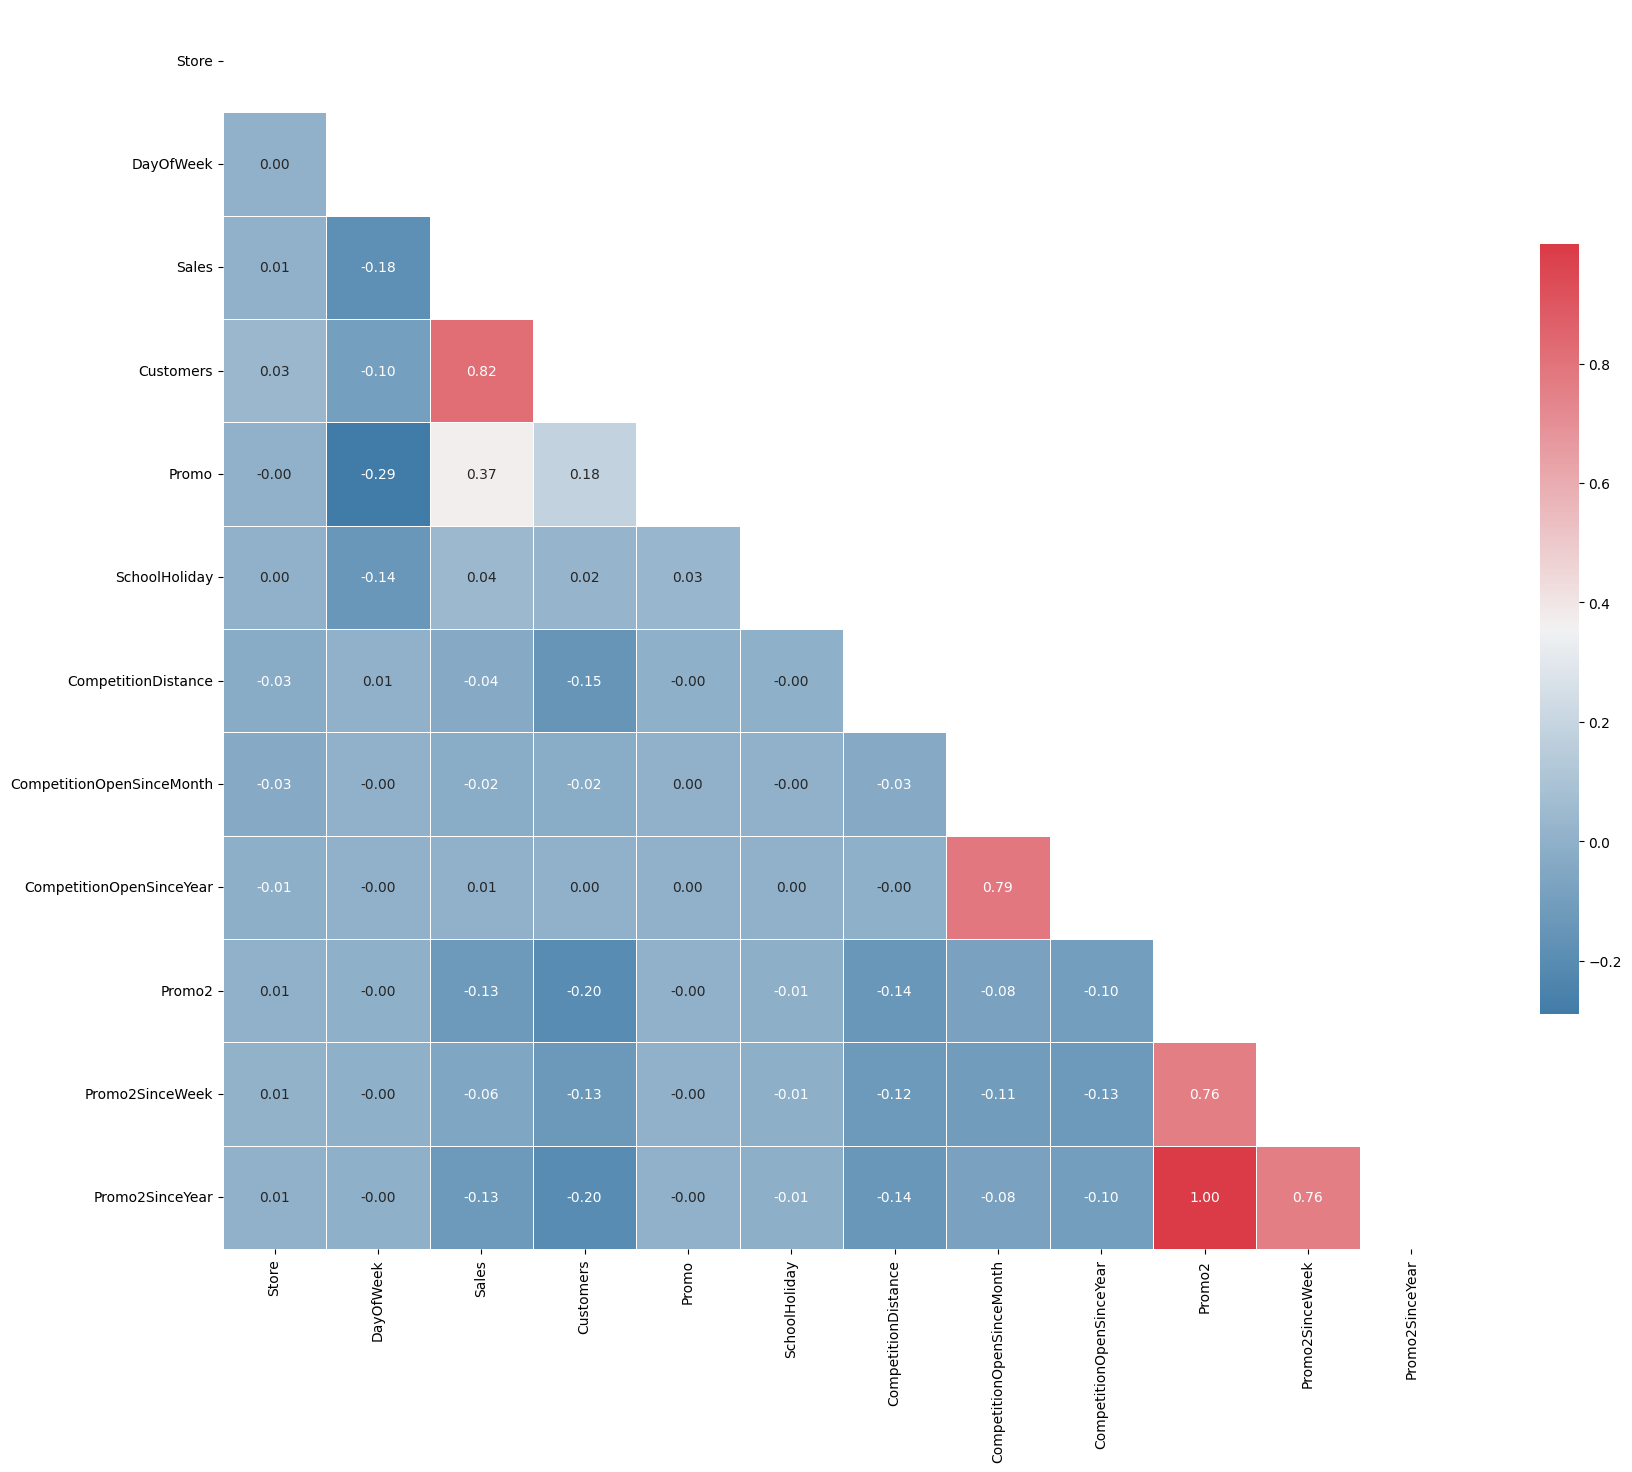

In [53]:
correlations = sales_train_all.corr()
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.color_palette("magma", as_cmap=True)
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap=cmap, mask=mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-54-eb276be290cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all.corr()['Sales'].sort_values(ascending=False)


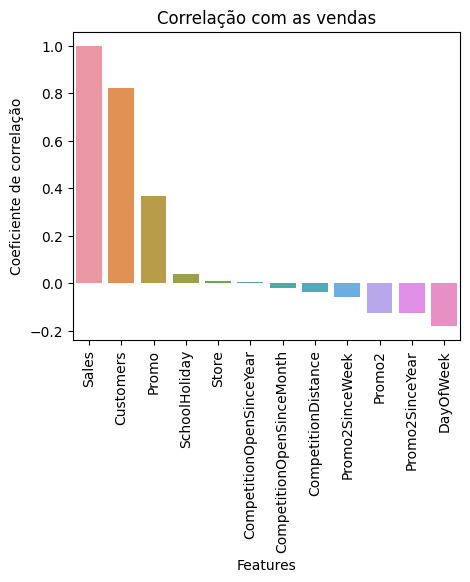

In [54]:
correlations = sales_train_all.corr()['Sales'].sort_values(ascending=False)
plt.figure(figsize=(5, 4))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlação com as vendas')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Coeficiente de correlação')
plt.show()

In [55]:
sales_train_all['Year'] = pd.DatetimeIndex(sales_train_all['Date']).year
sales_train_all['Month'] = pd.DatetimeIndex(sales_train_all['Date']).month
sales_train_all['Day'] = pd.DatetimeIndex(sales_train_all['Date']).day

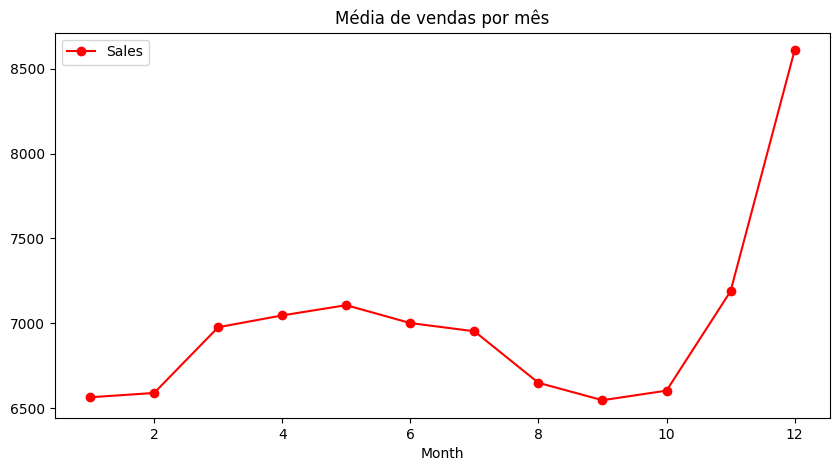

In [56]:
eixo = sales_train_all.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker = 'o', color = 'r');
eixo.set_title('Média de vendas por mês');

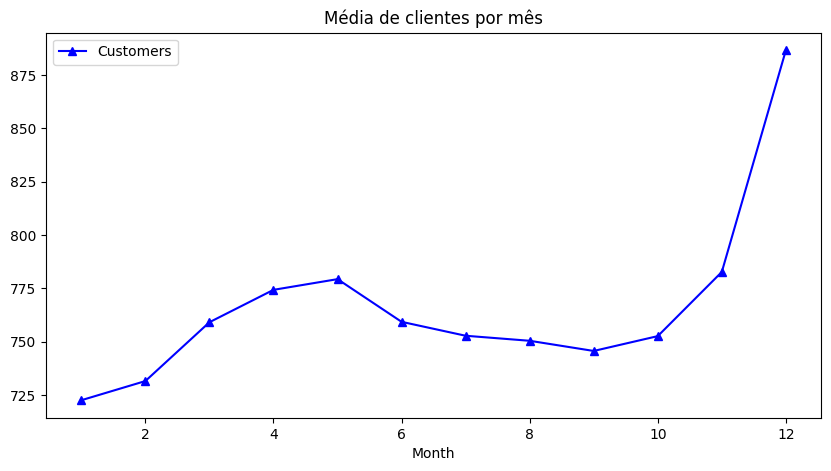

In [57]:
eixo = sales_train_all.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker = '^', color = 'b');
eixo.set_title('Média de clientes por mês');

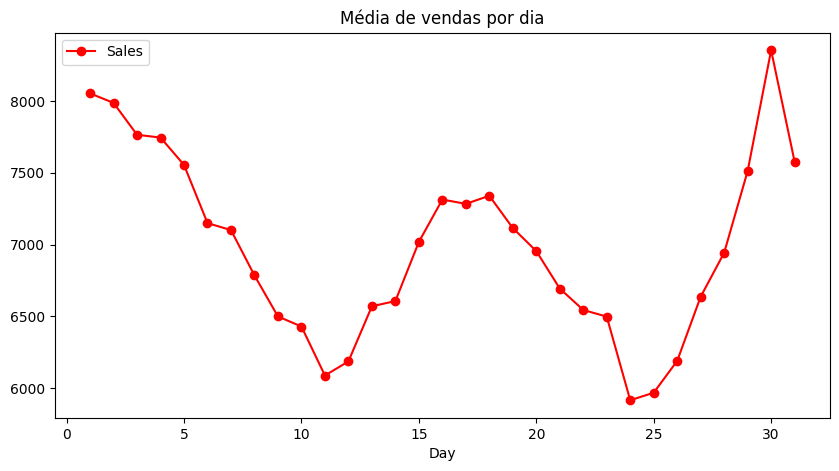

In [58]:
eixo = sales_train_all.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker = 'o', color = 'r');
eixo.set_title('Média de vendas por dia');

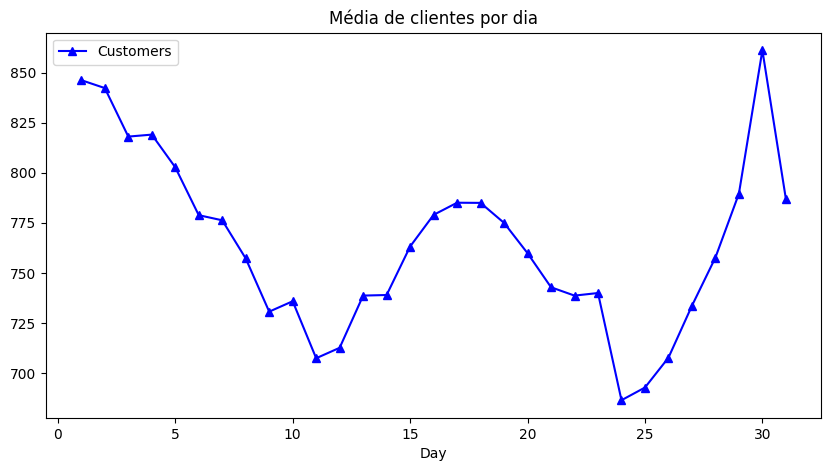

In [59]:
eixo = sales_train_all.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker = '^', color = 'b');
eixo.set_title('Média de clientes por dia');

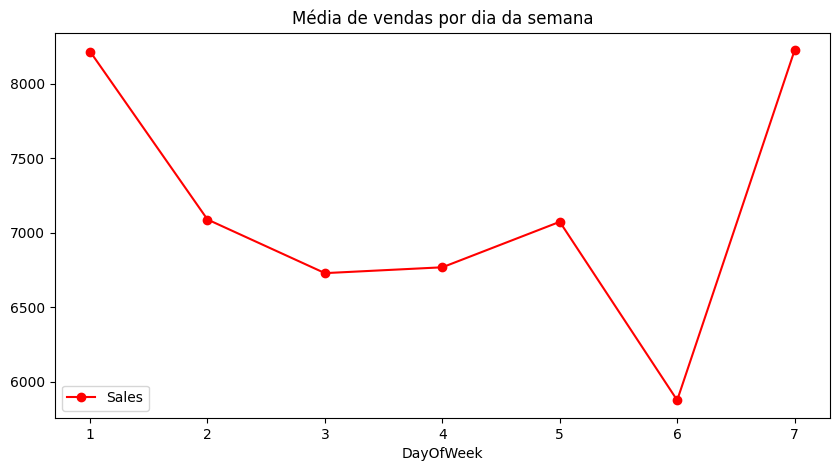

In [60]:
eixo = sales_train_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker = 'o', color = 'r');
eixo.set_title('Média de vendas por dia da semana');

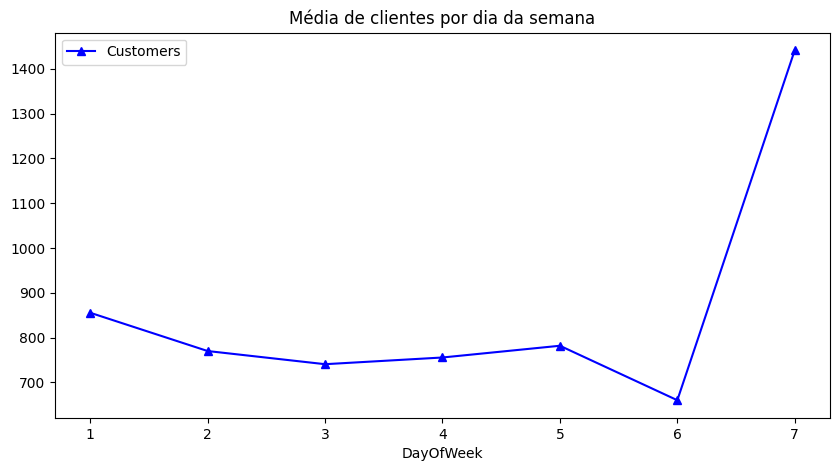

In [61]:
eixo = sales_train_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker = '^', color = 'b');
eixo.set_title('Média de clientes por dia da semana');

<ipython-input-62-ad9a884d51ac>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_train_all.groupby(['Date','StoreType']).mean()['Sales'].unstack().rolling(window=7).mean().plot(ax=ax)


<Axes: xlabel='Date'>

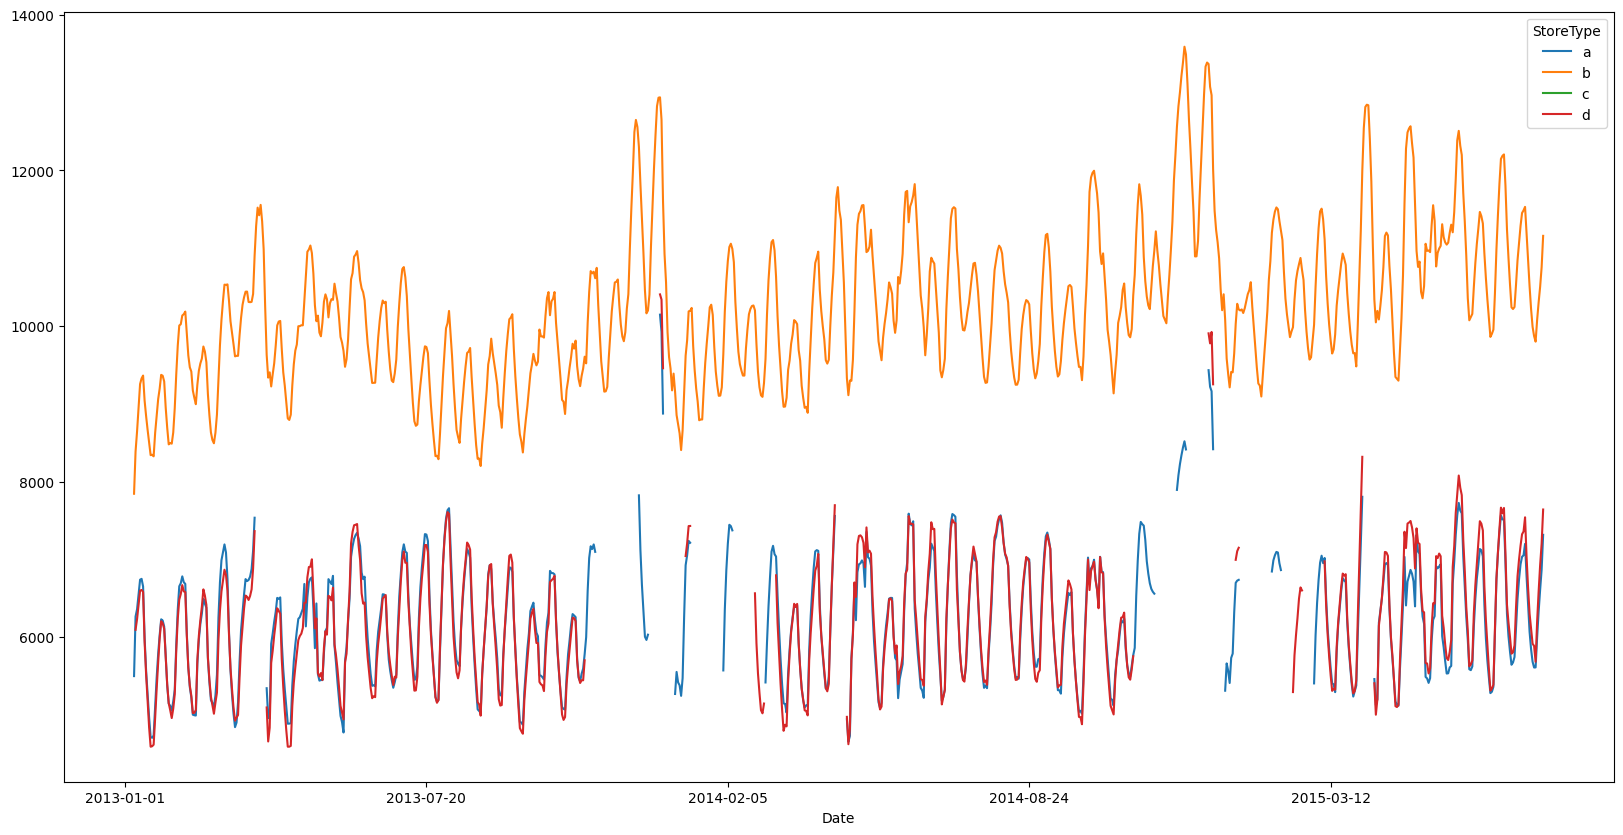

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all.groupby(['Date','StoreType']).mean()['Sales'].unstack().rolling(window=7).mean().plot(ax=ax)

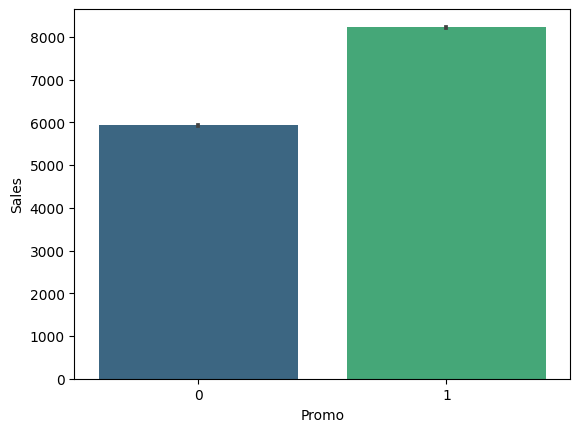

In [63]:
sns.barplot(x='Promo', y = 'Sales', data = sales_train_all, palette='viridis');

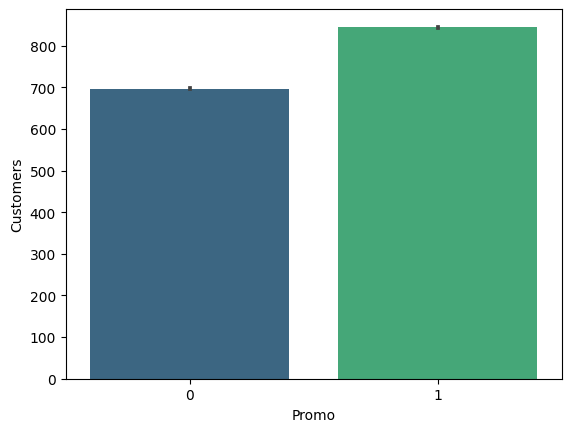

In [64]:
sns.barplot(x='Promo', y = 'Customers', data = sales_train_all, palette='viridis');

## Treinamento do Modelo

In [65]:
def sales_prediction (store_id, sales_df, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by = 'ds')

    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast)

    return sales_df, forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyixflgkw/fmqrcy9e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyixflgkw/qko4vysj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24855', 'data', 'file=/tmp/tmpyixflgkw/fmqrcy9e.json', 'init=/tmp/tmpyixflgkw/qko4vysj.json', 'output', 'file=/tmp/tmpyixflgkw/prophet_modeltrgmi0nf/prophet_model-20231105213433.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:34:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:34:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


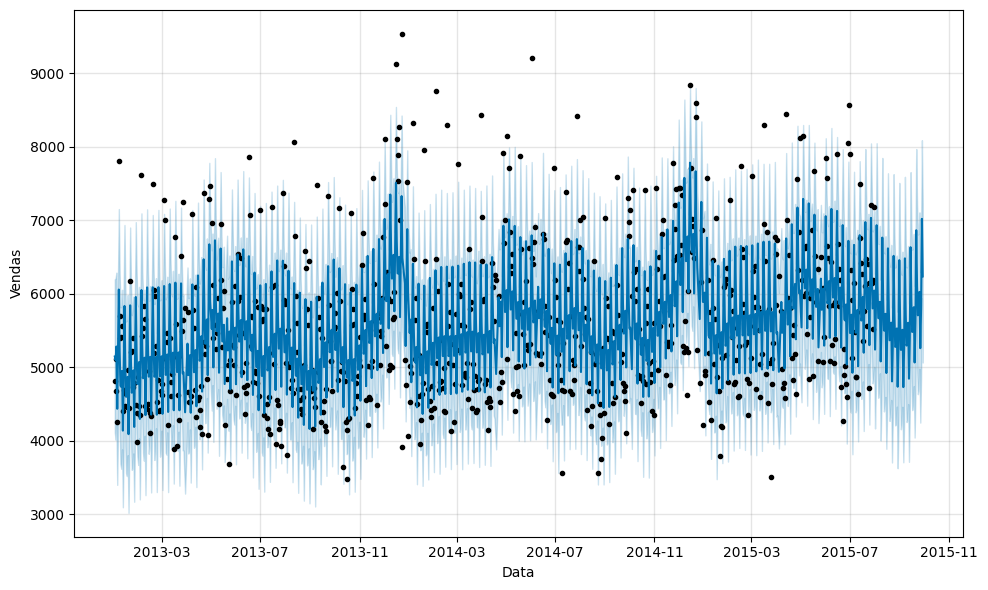

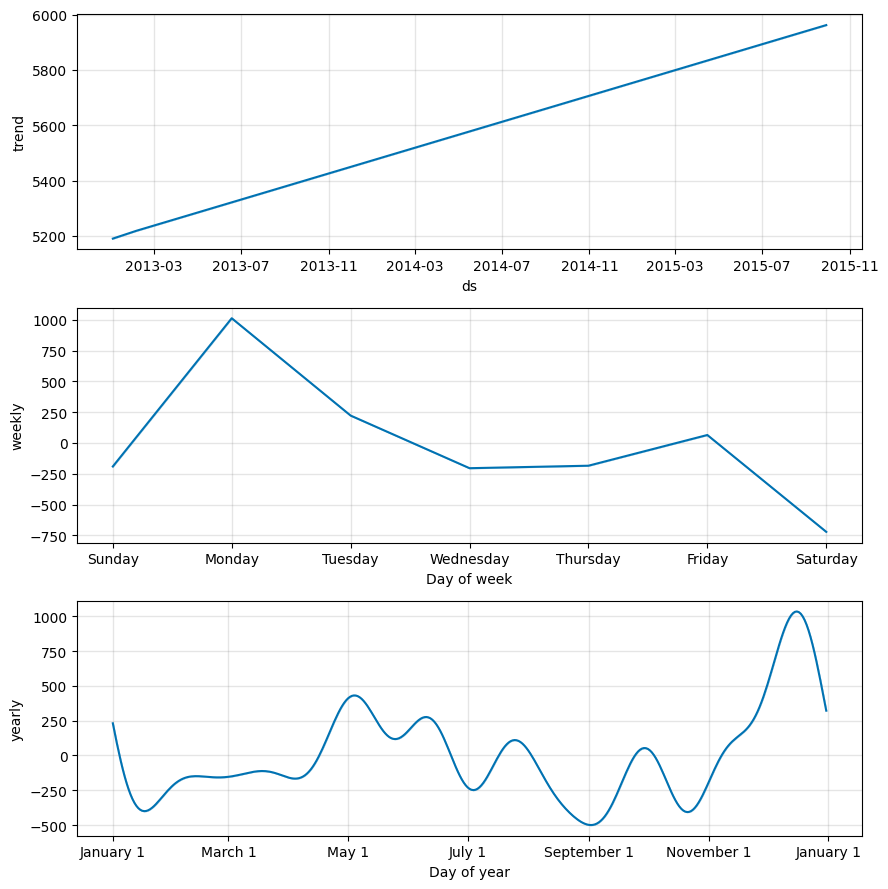

In [85]:
df_origin, df_prediction = sales_prediction(10, sales_train_all, 60)

In [86]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5916.526577,4168.240810,6271.468236,5916.526577,5916.526577,-675.503916,-675.503916,-675.503916,-720.328073,-720.328073,-720.328073,44.824157,44.824157,44.824157,0.0,0.0,0.0,5241.022661
785,2015-08-02,5917.294958,4686.279317,6836.223376,5917.294958,5917.294958,-165.648395,-165.648395,-165.648395,-190.330875,-190.330875,-190.330875,24.682481,24.682481,24.682481,0.0,0.0,0.0,5751.646564
786,2015-08-03,5918.063340,5873.631754,8048.067815,5918.063340,5918.063340,1014.627620,1014.627620,1014.627620,1011.846434,1011.846434,1011.846434,2.781186,2.781186,2.781186,0.0,0.0,0.0,6932.690960
787,2015-08-04,5918.831722,5058.684652,7161.894320,5918.831722,5918.831722,201.932232,201.932232,201.932232,222.454534,222.454534,222.454534,-20.522302,-20.522302,-20.522302,0.0,0.0,0.0,6120.763954
788,2015-08-05,5919.600104,4586.250779,6681.800874,5919.600104,5919.600104,-249.189126,-249.189126,-249.189126,-204.315415,-204.315415,-204.315415,-44.873711,-44.873711,-44.873711,0.0,0.0,0.0,5670.410978
789,2015-08-06,5920.368486,4651.930719,6680.293109,5920.368486,5920.368486,-254.128476,-254.128476,-254.128476,-184.197833,-184.197833,-184.197833,-69.930643,-69.930643,-69.930643,0.0,0.0,0.0,5666.240009
790,2015-08-07,5921.136867,4918.503047,6923.331588,5921.136867,5921.136867,-30.499153,-30.499153,-30.499153,64.871229,64.871229,64.871229,-95.370383,-95.370383,-95.370383,0.0,0.0,0.0,5890.637714
791,2015-08-08,5921.905249,4004.341932,6188.452717,5921.905249,5921.905249,-841.224648,-841.224648,-841.224648,-720.328073,-720.328073,-720.328073,-120.896575,-120.896575,-120.896575,0.0,0.0,0.0,5080.680601
792,2015-08-09,5922.673631,4524.447581,6682.869883,5922.672127,5922.673631,-336.575486,-336.575486,-336.575486,-190.330875,-190.330875,-190.330875,-146.244610,-146.244610,-146.244610,0.0,0.0,0.0,5586.098145
793,2015-08-10,5923.442013,5662.270197,7847.757996,5923.439370,5923.442013,840.660832,840.660832,840.660832,1011.846434,1011.846434,1011.846434,-171.185602,-171.185602,-171.185602,0.0,0.0,0.0,6764.102845


## Treinamento do modelo levando em conta os feriados

In [90]:
def sales_prediction (store_id, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    sales_df = sales_df.sort_values(by = 'ds')

    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
    figure2 = model.plot_components(forecast)

    return sales_df, forecast

In [95]:
school_holidays = sales_train_all[sales_train_all['SchoolHoliday'] == 1].loc[:,'Date'].values

In [97]:
state_holidays = sales_train_all[(sales_train_all['StateHoliday'] == 'a') |
                                (sales_train_all['StateHoliday'] == 'b') |
                                (sales_train_all['StateHoliday'] == 'c')].loc[:,'Date'].values

In [102]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                              'holiday': 'school_holidays'})

In [101]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                              'holiday': 'state_holidays'})

In [103]:
all_holidays = pd.concat((state_holidays, school_holidays))
all_holidays

,ds,holiday
0,2014-10-03,state_holidays
1,2013-10-03,state_holidays
2,2015-06-04,state_holidays
3,2014-06-19,state_holidays
4,2013-05-30,state_holidays
...,...,...
163452,2013-02-05,school_holidays
163453,2013-02-04,school_holidays
163454,2013-01-04,school_holidays
163455,2013-01-03,school_holidays


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyixflgkw/hzcafatt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyixflgkw/rwfzlzcv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5334', 'data', 'file=/tmp/tmpyixflgkw/hzcafatt.json', 'init=/tmp/tmpyixflgkw/rwfzlzcv.json', 'output', 'file=/tmp/tmpyixflgkw/prophet_model1fuzavoq/prophet_model-20231105214944.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:49:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:49:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


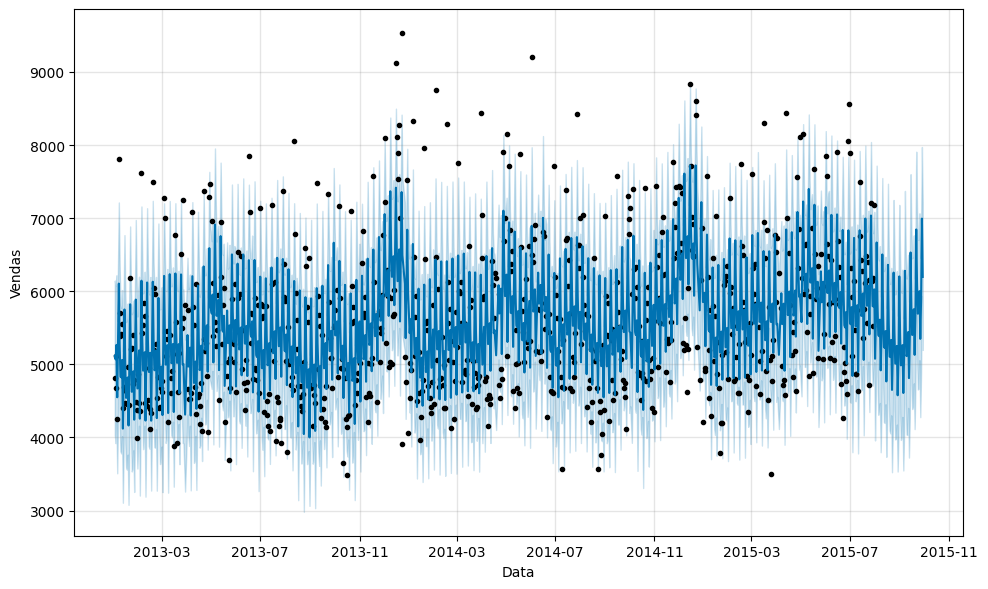

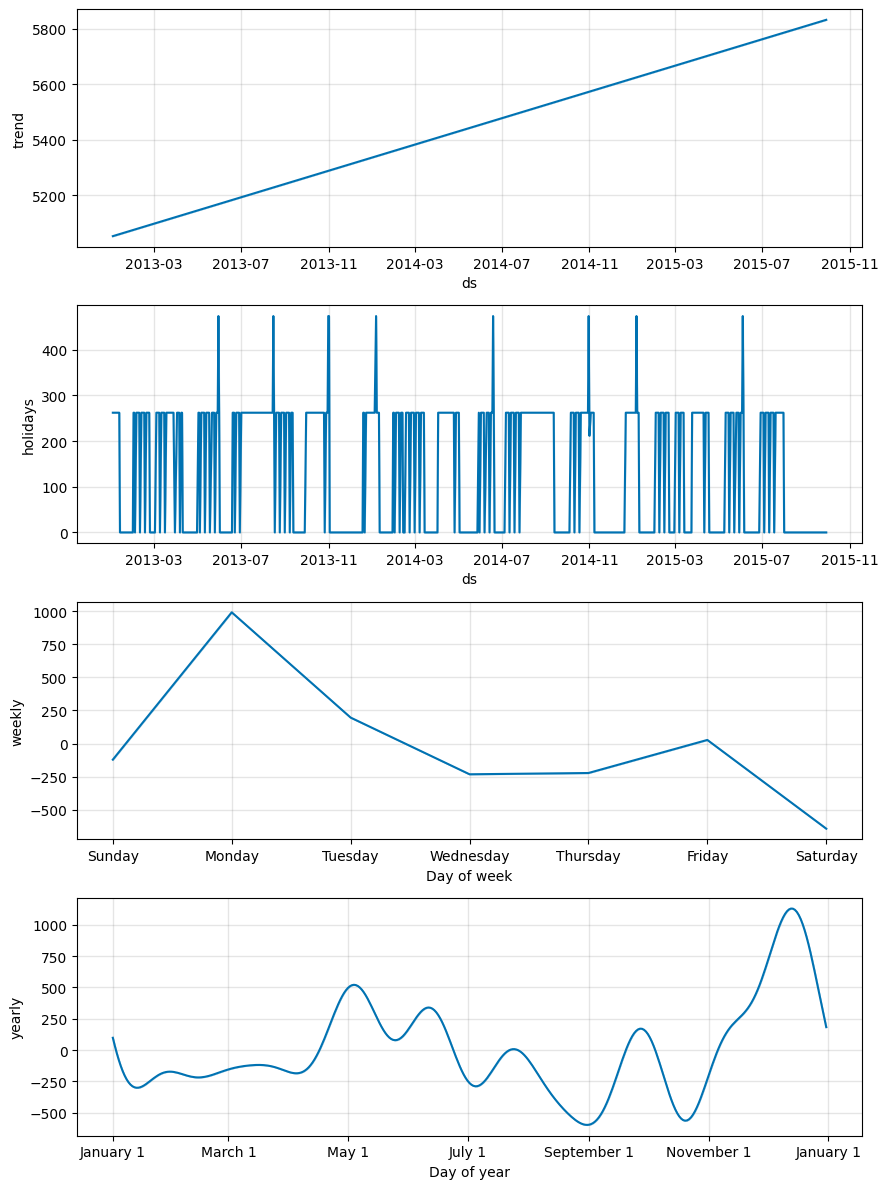

In [106]:
df_original, df_predicitin = sales_prediction(10, sales_train_all, all_holidays, 60)

In [109]:
previsao = df_prediction.tail(60)

In [110]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5916.526577,4168.240810,6271.468236,5916.526577,5916.526577,-675.503916,-675.503916,-675.503916,-720.328073,-720.328073,-720.328073,44.824157,44.824157,44.824157,0.0,0.0,0.0,5241.022661
785,2015-08-02,5917.294958,4686.279317,6836.223376,5917.294958,5917.294958,-165.648395,-165.648395,-165.648395,-190.330875,-190.330875,-190.330875,24.682481,24.682481,24.682481,0.0,0.0,0.0,5751.646564
786,2015-08-03,5918.063340,5873.631754,8048.067815,5918.063340,5918.063340,1014.627620,1014.627620,1014.627620,1011.846434,1011.846434,1011.846434,2.781186,2.781186,2.781186,0.0,0.0,0.0,6932.690960
787,2015-08-04,5918.831722,5058.684652,7161.894320,5918.831722,5918.831722,201.932232,201.932232,201.932232,222.454534,222.454534,222.454534,-20.522302,-20.522302,-20.522302,0.0,0.0,0.0,6120.763954
788,2015-08-05,5919.600104,4586.250779,6681.800874,5919.600104,5919.600104,-249.189126,-249.189126,-249.189126,-204.315415,-204.315415,-204.315415,-44.873711,-44.873711,-44.873711,0.0,0.0,0.0,5670.410978
789,2015-08-06,5920.368486,4651.930719,6680.293109,5920.368486,5920.368486,-254.128476,-254.128476,-254.128476,-184.197833,-184.197833,-184.197833,-69.930643,-69.930643,-69.930643,0.0,0.0,0.0,5666.240009
790,2015-08-07,5921.136867,4918.503047,6923.331588,5921.136867,5921.136867,-30.499153,-30.499153,-30.499153,64.871229,64.871229,64.871229,-95.370383,-95.370383,-95.370383,0.0,0.0,0.0,5890.637714
791,2015-08-08,5921.905249,4004.341932,6188.452717,5921.905249,5921.905249,-841.224648,-841.224648,-841.224648,-720.328073,-720.328073,-720.328073,-120.896575,-120.896575,-120.896575,0.0,0.0,0.0,5080.680601
792,2015-08-09,5922.673631,4524.447581,6682.869883,5922.672127,5922.673631,-336.575486,-336.575486,-336.575486,-190.330875,-190.330875,-190.330875,-146.244610,-146.244610,-146.244610,0.0,0.0,0.0,5586.098145
793,2015-08-10,5923.442013,5662.270197,7847.757996,5923.439370,5923.442013,840.660832,840.660832,840.660832,1011.846434,1011.846434,1011.846434,-171.185602,-171.185602,-171.185602,0.0,0.0,0.0,6764.102845


<ipython-input-119-203900fafa00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previsao['ds'] = pd.to_datetime(previsao['ds'])


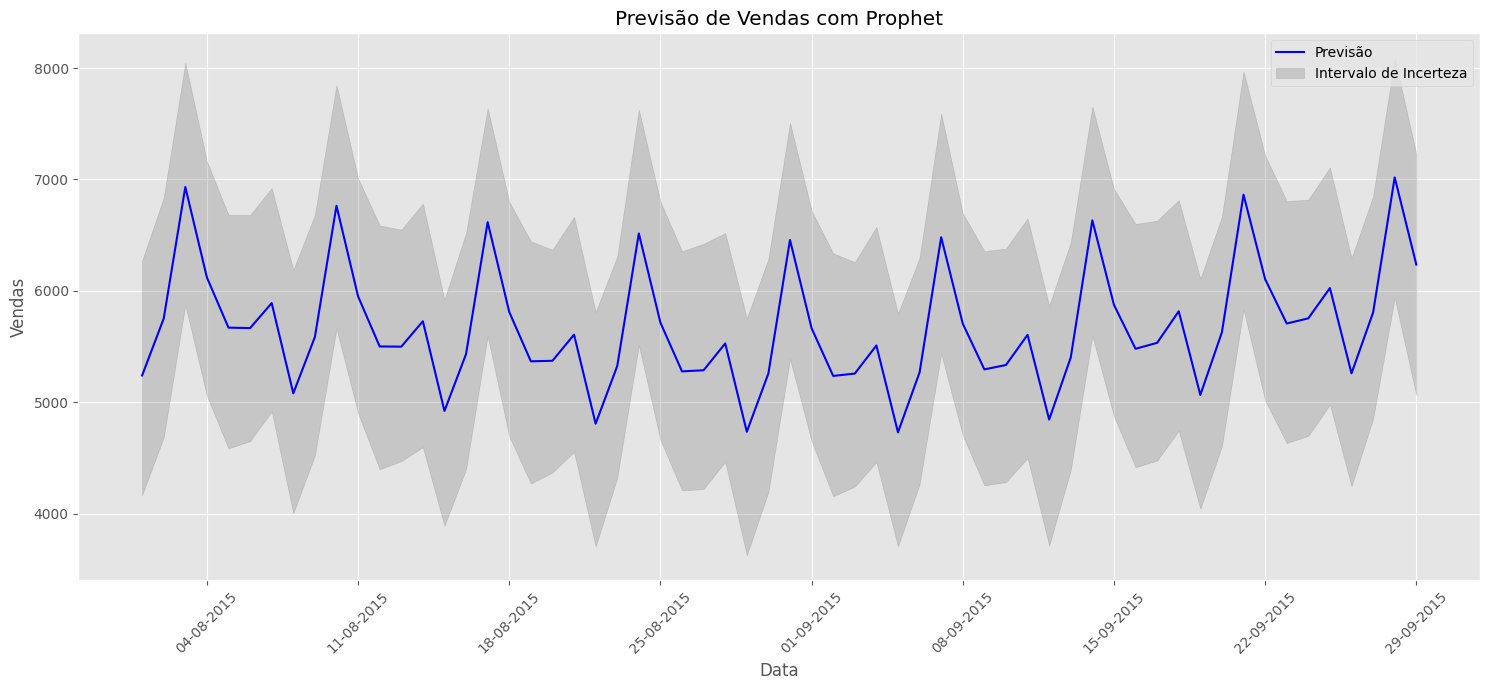

In [119]:
previsao['ds'] = pd.to_datetime(previsao['ds'])
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='blue')
ax.fill_between(previsao['ds'], previsao['yhat_lower'], previsao['yhat_upper'], color='gray', alpha=0.3, label='Intervalo de Incerteza')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.xticks(rotation=45)

plt.title('Previsão de Vendas com Prophet')
plt.xlabel('Data')
plt.ylabel('Vendas')

plt.legend()

plt.tight_layout()

plt.show()